In [1]:
from sympy import *
from sympy.physics.mechanics import *

import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

plt.rcParams['animation.ffmpeg_path'] = '\ffmpeg\ffmpeg-2024-11-13-git-322b240cea-full_build\bin'

init_vprinting()

In [1]:
m, g, ell, t = symbols('m g ell t')
theta, phi = dynamicsymbols('theta phi')

xm = ell*sin(theta)   #*cos(phi)
ym = ell*cos(theta)   #*sin(phi)
# zm = -ell*cos(theta)

xm_dot = diff(xm, t)
ym_dot = diff(ym, t)
# zm_dot = diff(zm, t)

theta_dot = diff(theta, t)
theta_ddot = diff(theta_dot, t)

phi_dot = diff(phi, t)
phi_ddot = diff(phi_dot, t)


K = 0.5*m*(xm_dot**2 + ym_dot**2)
P = m*g*ym
tau = 2 *sin(0.5 * t)
L = K - P
L, K, P

NameError: name 'symbols' is not defined

In [ ]:
#Euler-Lagrange equation
eqn = diff(diff(L, theta_dot), t) - diff(L, theta) - tau
# eqn2 = diff(diff(L, phi_dot), t) - diff(L, phi)
sln = solve([eqn], (theta_ddot), simplify=True, rational=False)
Eq((theta_ddot), (sln[theta_ddot]))
eqn

In [ ]:
x = Matrix([theta, theta_dot])
x_dot = diff(x, t)
Eq(x_dot, Matrix([theta_dot, sln[theta_ddot]]))

      ⎡              θ̇              ⎤
      ⎢                             ⎥
⎡θ̇⎤   ⎢1.0⋅g⋅sin(θ)   2.0⋅sin(0.5⋅t)⎥
⎢ ⎥ = ⎢──────────── + ──────────────⎥
⎣θ̈⎦   ⎢    ell               2      ⎥
      ⎣                   ell ⋅m    ⎦

# Simulation

In [7]:
g = 9.81
ell = 1
m = 1
theta0 = np.deg2rad(30)
theta_dot0 = 0

# phi0 = np.deg2rad(15)
# phi_dot0 = 0
tau = 2 * np.sin(0.5 * t)

def pendulum_ODE(t, Y):
    y, y_prime = Y  # Y[0] = y(t), Y[1] = y'(t)
    tau = 2 * np.sin(0.5 * t)
    y_double_prime = 3 * (tau - 4.905 * np.cos(y))  # Solve for y''(t)
    return [y_prime, y_double_prime]

sol = solve_ivp(pendulum_ODE, [0, 10], (theta0, theta_dot0),
    t_eval = np.linspace(0, 10, 1000))

theta_ddot = []
i = 0
t_eval = np.linspace(0, 10, 1000)

theta = sol.y[0]
tau = []
for i in range(len(t_eval)):
    theta_ddot.append(3 * ((2*np.sin(0.5*t_eval[i])) - 0.5 * g * ell *np.cos(theta[i]))/(m * ell**2) )
    tau.append(2*np.sin(0.5*t_eval[i]))
theta_dot = sol.y[1]
print(np.shape(sol.y))
t = sol.t

theta_deg = np.rad2deg(sol.y[0])
theta_dot_deg = np.rad2deg(sol.y[1])

np.save('./data/simplePendLE', np.array([theta, theta_dot, theta_ddot]))


(2, 1000)


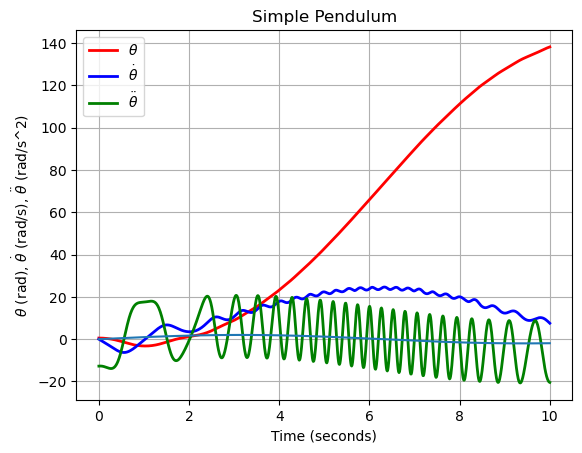

In [8]:
plt.plot(t, theta, 'r', lw=2, label=r'$\theta$')
plt.plot(t, theta_dot, 'b', lw=2, label=r'$\dot \theta$') 
plt.plot(t, theta_ddot, 'g', lw=2, label=r'$\ddot \theta$')
plt.plot(t, tau)
plt.title('Simple Pendulum')
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel(r'$\theta$ (rad), $\dot \theta$ (rad/s), $\ddot \theta$ (rad/s^2)')
plt.grid()
plt.show()